# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

This data exploratory project takes into analysis 5 different datasets:
- fatal police shootings (From 01/2015 to 12/2017)
- US census data on poverty rate
- high school graduation rate
- median household income
- racial demographics

Especially the first, main one is very detailed, containing many aspects of each death, for example whether the person was armed or experiencing any mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters"
The remaining datasets will be helpful in the process of finding various correlations, similarities and forming conclusions about all these fatal shootings.
The main objective of this project is to tell if any human features, like age, race, etc. contribute to being involved in deathful police shootings. No more time to waste, let's get started.

## Required statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

## Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

## Loading the Data

In [8]:
df_hh_income = pd.read_csv('Data/imported_data/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Data/imported_data/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Data/imported_data/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Data/imported_data/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Data/imported_data/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

In [344]:
dfs = [df_hh_income,df_pct_poverty,df_pct_completed_hs,df_share_race_city,df_fatalities]
for df in dfs:
  print(f"{df.info(memory_usage=False)}\nAny NaN values? {df.isna().values.any()}\nDuplicates? {df.duplicated().values.any()}\n ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29322 non-null  object
dtypes: object(3)None
Any NaN values? False
Duplicates? False
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)None
Any NaN values? True
Duplicates? False
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                ----

## Data Cleaning - Missing Values and Duplicates

Only two datasets happen to have a few missing values - they are gonna be replaced with 0.

In [12]:
df_hh_income.fillna(0, inplace=True)
df_fatalities.fillna(0,inplace=True)

# Data Exploration and Analysis

## Poverty and Education

Which state has the highest poverty rate? Which state has the lowest poverty rate?
What about education? Do many Americans not finish high school?
Is there any clear correlation between those measures?

In [15]:
df_pct_poverty.sample(5)
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(str).str.replace("-","")
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])

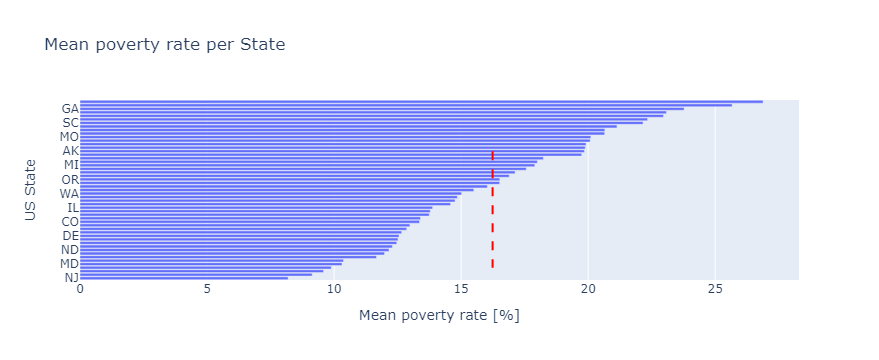

In [16]:
df_mean_poverty = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate':'mean'}).sort_values(by='poverty_rate', ascending=True)
fig = px.bar(df_mean_poverty,
       x='poverty_rate',
       y='Geographic Area',
       orientation='h',
       title='Mean poverty rate per State',
       labels={'poverty_rate':'Mean poverty rate [%]','Geographic Area':'US State'})
mean_line = df_mean_poverty['poverty_rate'].mean()
fig.add_shape(go.layout.Shape(
    type="line",
    x0=mean_line,
    x1=mean_line,
    y0=df_mean_poverty['Geographic Area'].min(),
    y1=df_mean_poverty['Geographic Area'].max(),
    line=dict(color="red", dash="dash"),
))
fig.update_layout(height=600)

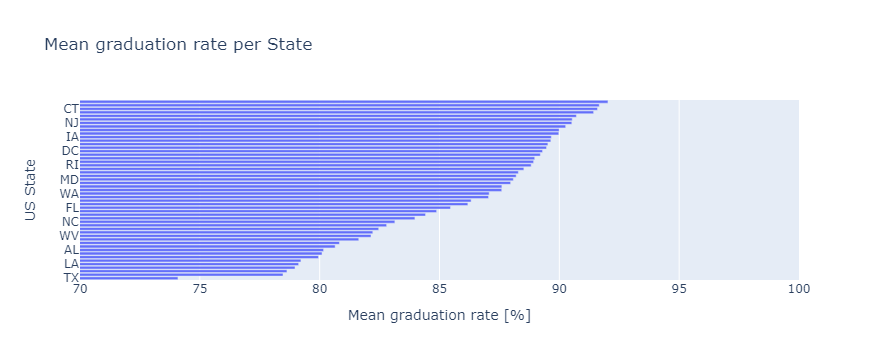

In [17]:
df_pct_completed_hs.sample(5)
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(str).str.replace("-","0")
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])
df_mean_graduation = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs':'mean'}).sort_values(by='percent_completed_hs', ascending=True)
fig = px.bar(df_mean_graduation,
             x='percent_completed_hs',
             y='Geographic Area',
             orientation='h',
             title='Mean graduation rate per State',
             labels={'percent_completed_hs':'Mean graduation rate [%]','Geographic Area':'US State'})
fig.update_layout(xaxis=dict(range=[70, 100]),
                 height=600)

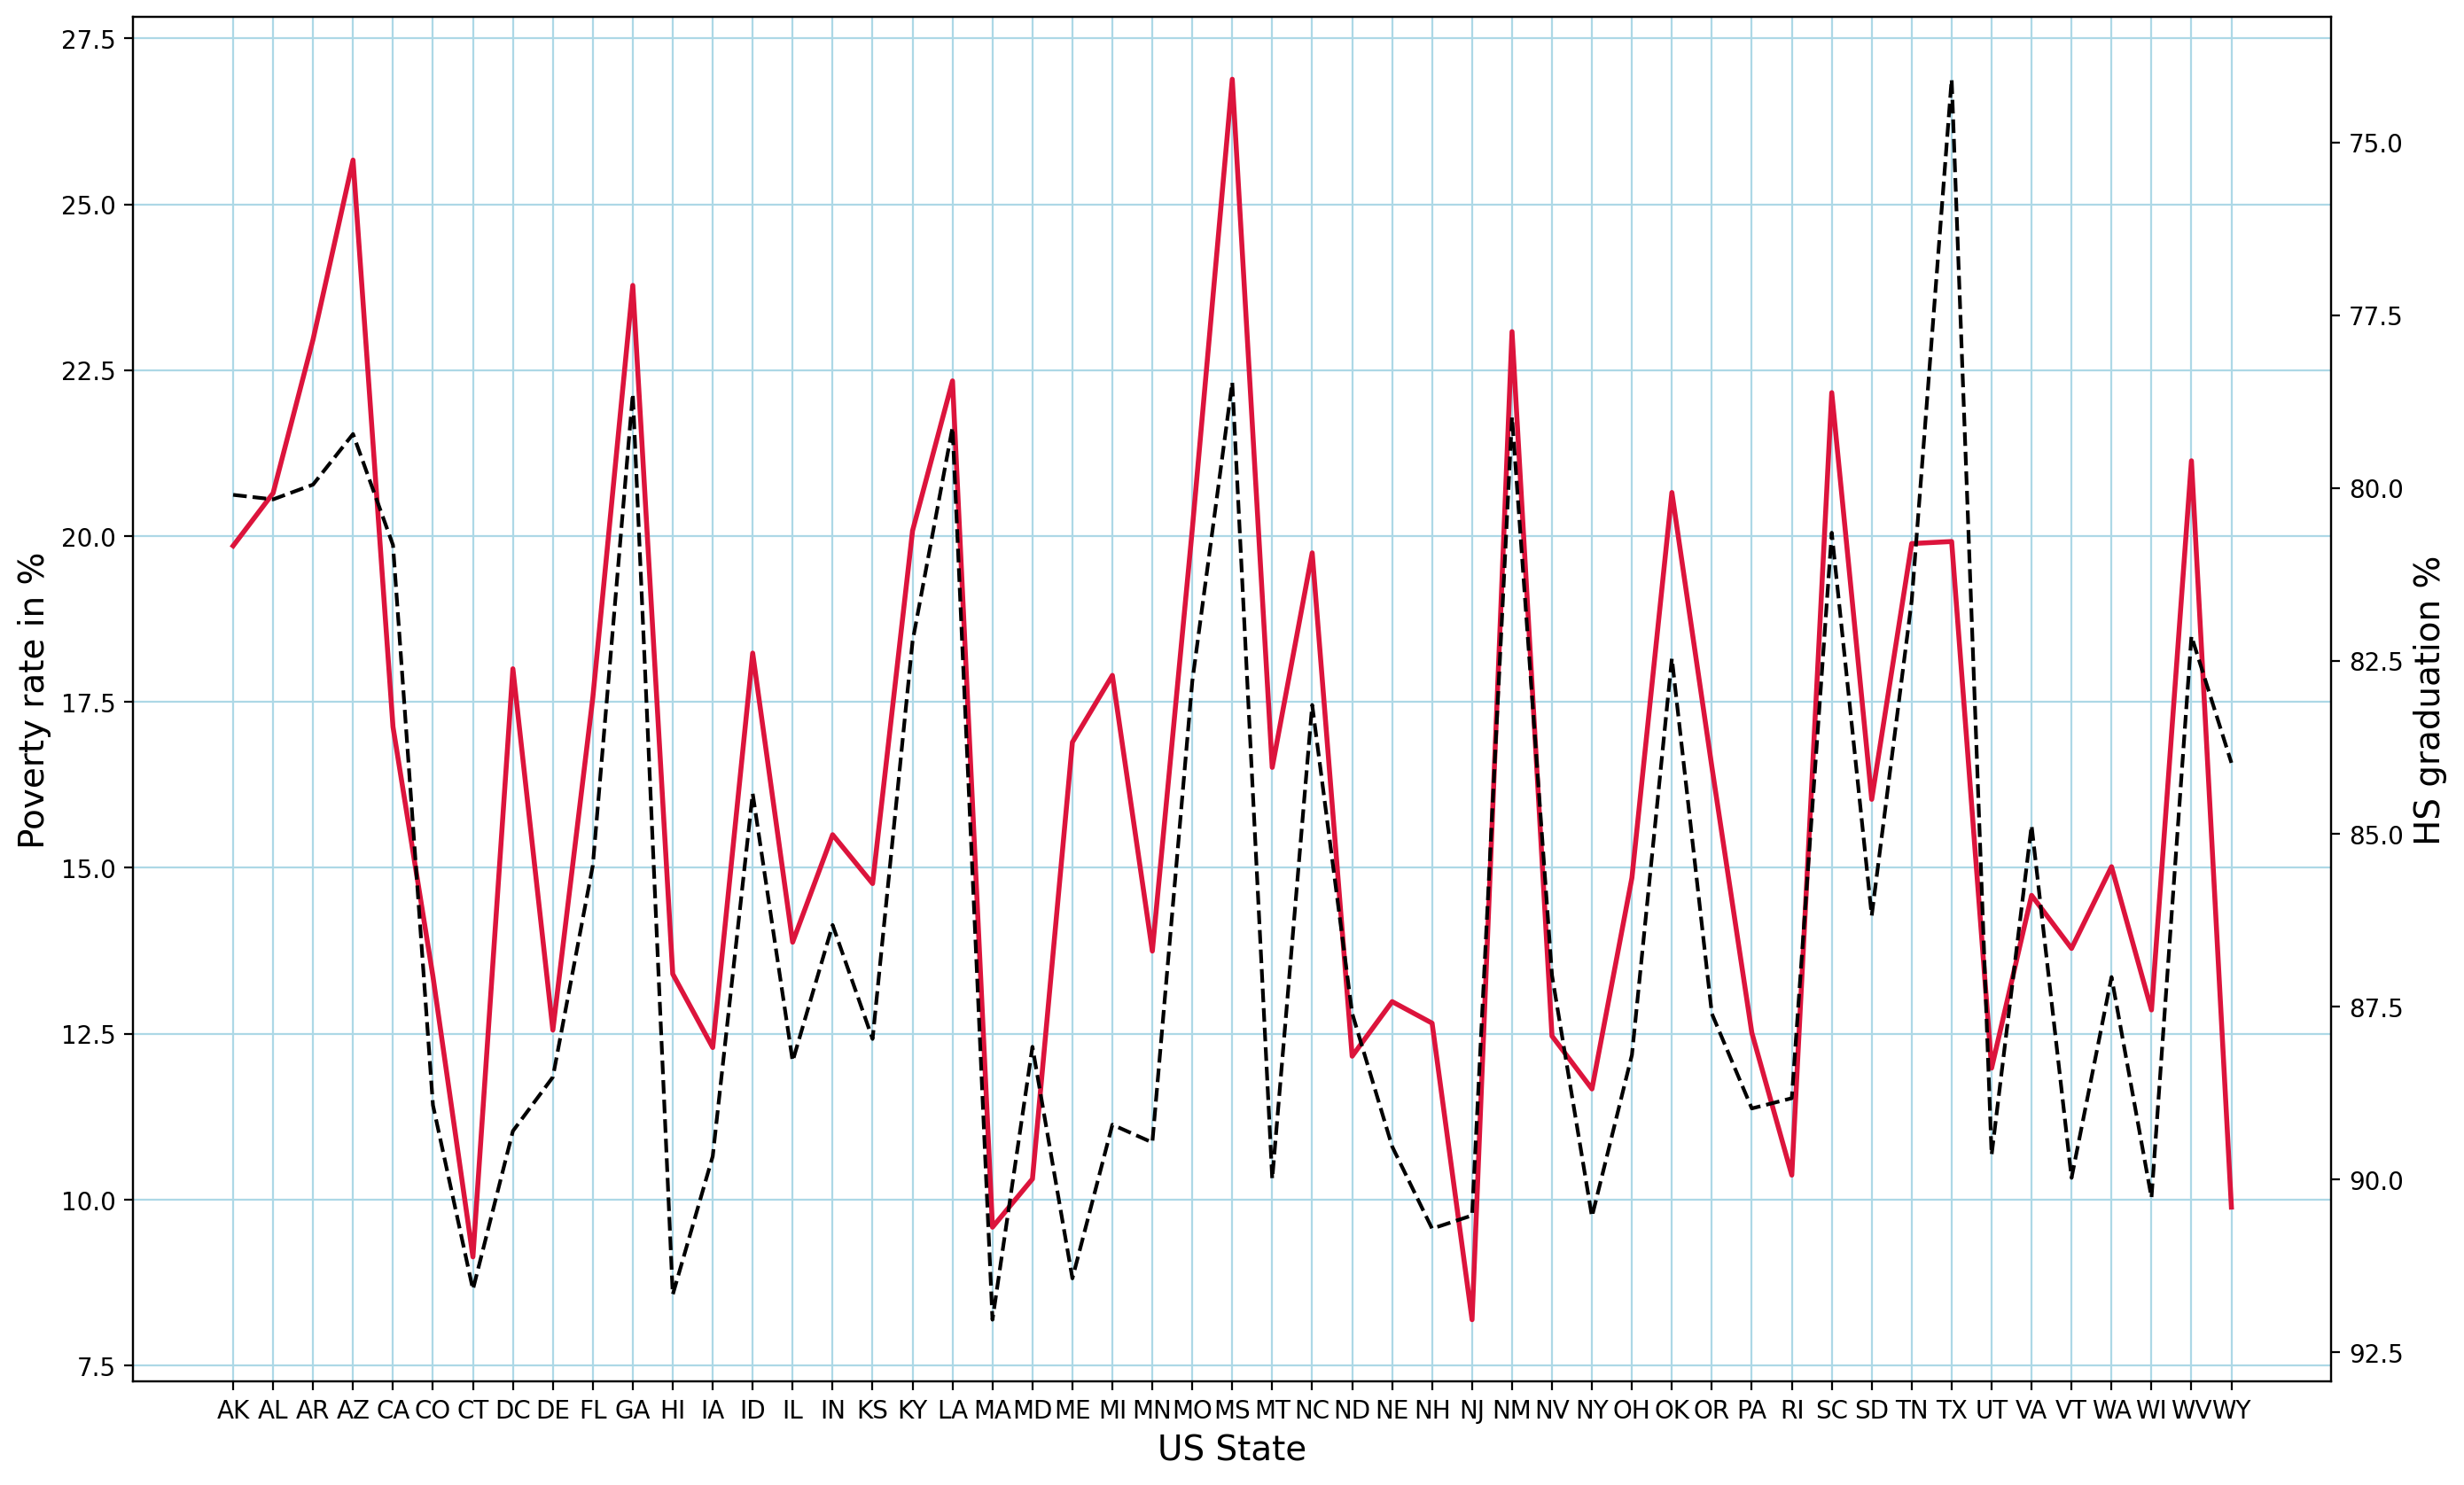

In [69]:
df_mean_poverty = df_mean_poverty.sort_values(by='Geographic Area')
df_mean_graduation = df_mean_graduation.sort_values(by='Geographic Area')
fig = plt.figure(figsize=(16,10),dpi=200)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df_mean_poverty['Geographic Area'],df_mean_poverty['poverty_rate'],color='crimson',linewidth=2)
ax1.grid(color='lightblue')
ax1.set_ylabel('Poverty rate in %', fontsize=14)
ax1.set_xlabel('US State', fontsize=14)
ax2.plot(df_mean_poverty['Geographic Area'],df_mean_graduation['percent_completed_hs'], color='black',linestyle='--')
ax2.invert_yaxis()
ax2.set_ylabel('HS graduation %',fontsize=14)


df_combined = pd.merge(df_mean_poverty, df_mean_graduation, on='Geographic Area', how='outer')

Above charts, especially the last one, show how the poverty rate and high school graduation are correlated. In majority of the states, the low HS graduation % causes high poverty levels. Appropriately, the higher the graduation percentage is, the less poverty is observed. This observation cannot be applied strictly to every state however, because when we look at the graduation graph itself, all states have mean graduation rate above 75% and the only state below than level is Texas (TX). Surprisingly, the mean poverty rate of Texas is pretty high above mean poverty level of the whole US. That shows the school graduation is not really a mandatory anti-poverty condition for all cases.

Below additional graphs of Kernel density and regression are added.

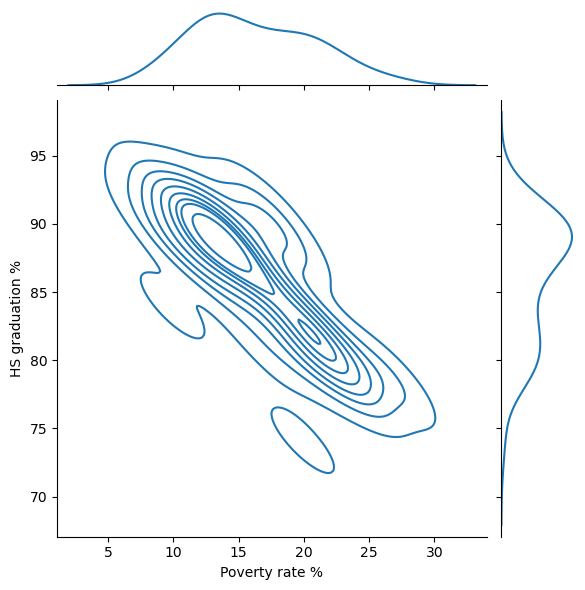

In [84]:
kde = sns.jointplot(data=df_combined,
              x="poverty_rate",
              y="percent_completed_hs",
              kind="kde")
kde.set_axis_labels(xlabel='Poverty rate %',ylabel='HS graduation %')

[Text(0.5, 0, 'Poverty rate %'), Text(0, 0.5, 'HS graduation %')]

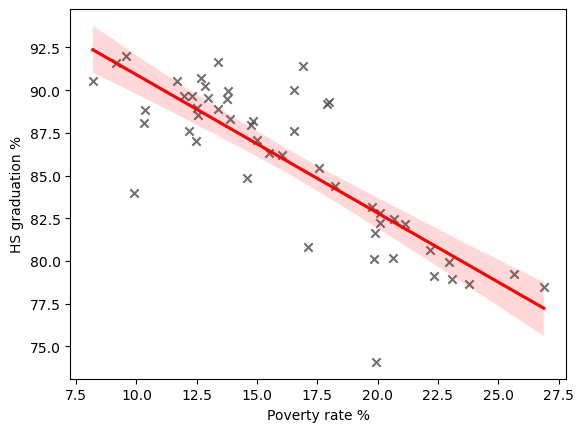

In [89]:
lreg = sns.regplot(data=df_combined,
            x="poverty_rate",
            y="percent_completed_hs",
            marker="x",
            color=".3",
            line_kws=dict(color="r"))
lreg.set(xlabel='Poverty rate %',ylabel='HS graduation %')

## Races 

Following chart visualises the share of the white, black, hispanic, asian and native american population in each US State.

In [24]:
df_share_race_city.head()
df_share_race_city.info()
columns_to_convert = ['share_white','share_black','share_native_american','share_asian','share_hispanic']
df_share_race_city[columns_to_convert] = df_share_race_city[columns_to_convert].apply(pd.to_numeric,errors='coerce')
df_share_race_state = df_share_race_city.groupby('Geographic area',as_index=False).agg({'share_white':'mean',
                                                                                        'share_black':'mean',
                                                                                        'share_native_american':'mean',
                                                                                        'share_asian':'mean',
                                                                                        'share_hispanic':'mean'}).sort_values(by='Geographic area')
df_share_race_state.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


Geographic area  share_white  share_black  share_native_american  \
0              AK        45.65         0.57                  45.86   
1              AL        72.51        23.32                   0.66   
2              AR        78.45        16.30                   0.76   
3              AZ        59.93         0.95                  28.59   
4              CA        71.87         2.69                   1.72   

   share_asian  share_hispanic  
0         1.39            2.15  
1         0.48            2.98  
2         0.48            4.27  
3         0.73           20.14  
4         5.57           29.65

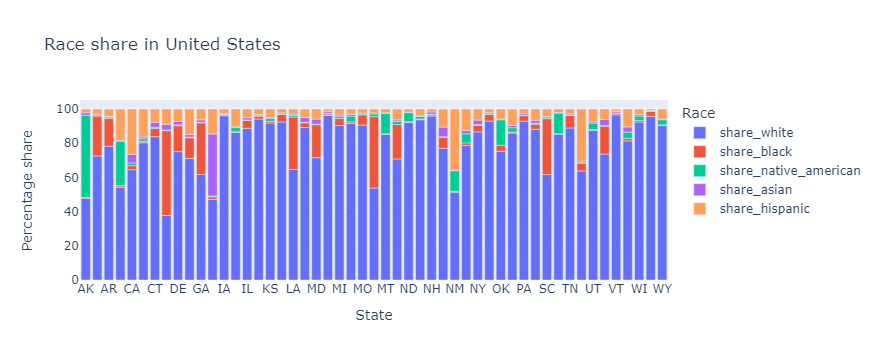

In [95]:
df_share_race_state[columns_to_convert] = df_share_race_state[columns_to_convert].div(df_share_race_state[columns_to_convert].sum(axis=1),axis=0)*100
px.bar(df_share_race_state,
       x='Geographic area',
       y=['share_white','share_black','share_native_american','share_asian','share_hispanic'],
       title='Race share in United States',
       labels={'value':'Percentage share','Geographic area':'State','variable':'Race',})

As we see, the race distribution significantly varies from one state to another, so the next couple of charts will take the deaths in these states into analysis.

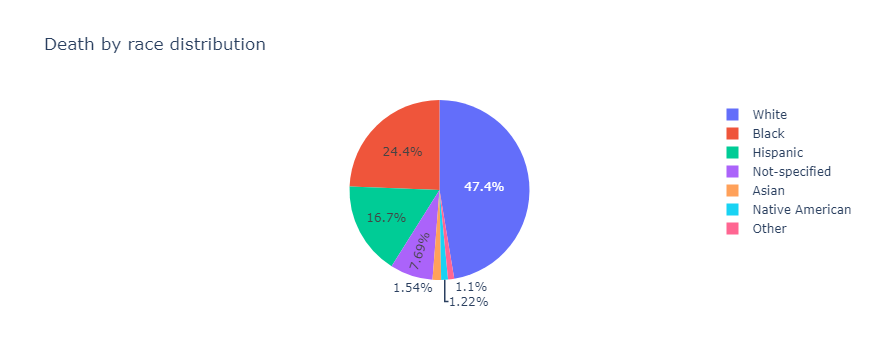

In [118]:
df_fatalities['date']=pd.to_datetime(df_fatalities['date'])
df_fatalities.head()
death_by_race = df_fatalities['race'].value_counts()
px.pie(labels= death_by_race.index,
       values = death_by_race.values,
       names=['White','Black','Hispanic','Not-specified','Asian','Native American','Other'],
       title='Death by race distribution')

Nearly half of the victims were white, which should not be surprising since this race stands for the most numerous in vast majority of states. However, when we sum three top races: white, black and hispanic, we can see that they make it up for ca. 90% of all races in the Washington Post's data set. Still a lot of the victims did not have the race specified.

## Age and Gender

Let's see how aspects like age or gender contribute to the fatal police shootings.

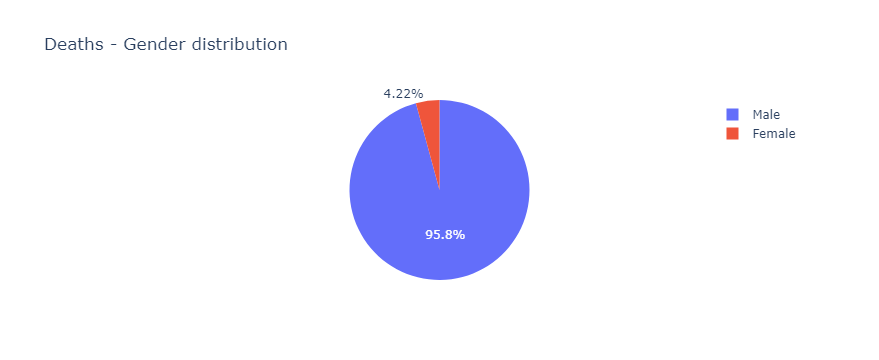

In [123]:
px.pie(labels = df_fatalities.gender.index,
       values = df_fatalities.gender.value_counts(),
       names=['Male','Female'],
       title='Deaths - Gender distribution')

The gender breakdown is nothing special, but breaking the data by age might be more curious.

In [39]:
under_25 = df_fatalities.age.where(df_fatalities.age<25).count()/df_fatalities.age.count() * 100
under_25

20.78895463510848

Above calculation shows that over 20% of victims in analyzed data set were younger than 25 years old, which is terrifying to think of.

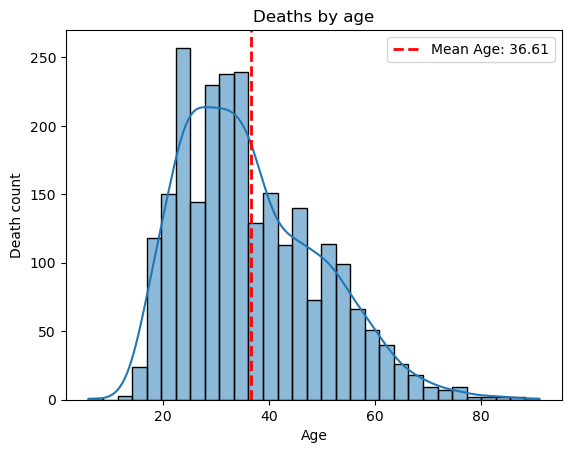

In [327]:
mean_age = df_fatalities.loc[df_fatalities['age'] != 0, 'age'].mean()
fig = sns.histplot(df_fatalities.where(df_fatalities.age != 0),
             x='age',
             kde=True)
fig.set(xlabel='Age',ylabel='Death count',title='Deaths by age')
fig.axvline(x=mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
fig.legend()

Looking at the above graph we can tell, that the majority of killed people was in the age of 20-40 years old, but it is stunning how many deaths there are even after the age of 60. Were these deaths necessary?
It might be also worth looking at the race distribution in this age-death count correlation, so below there is a set of plots showing deaths by age & races.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



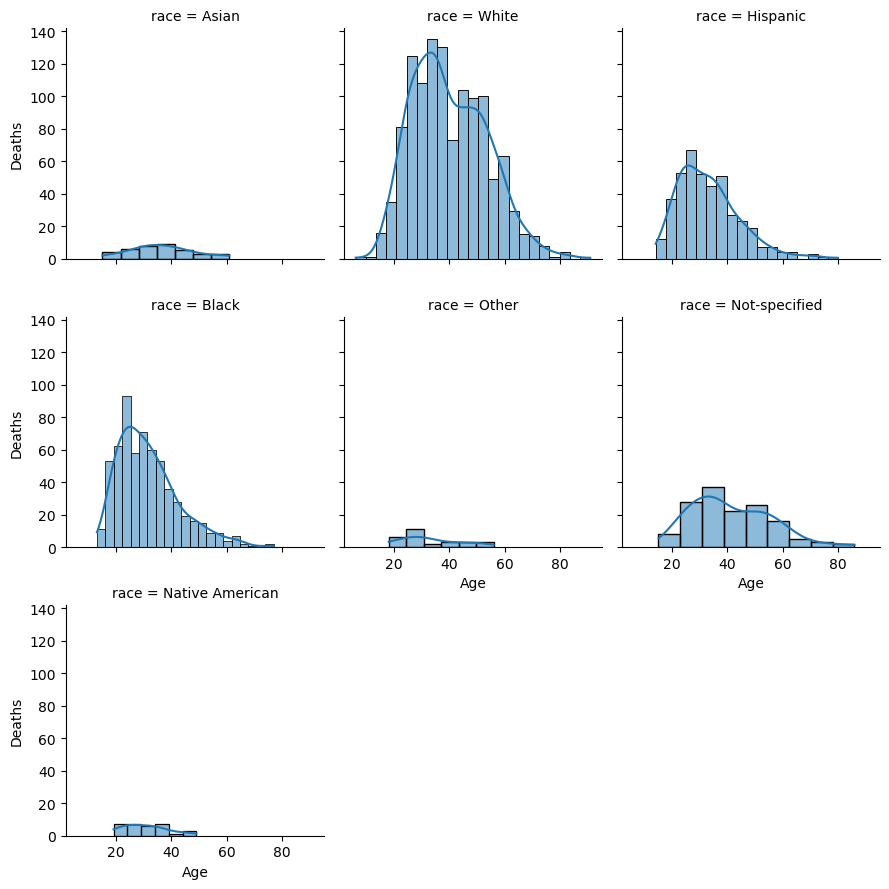

In [158]:
df_fatalities['race'] = df_fatalities['race'].replace({
    'B': 'Black', 'W': 'White', 'O': 'Other', 'A': 'Asian', 'N': 'Native American', 'H': 'Hispanic', 0:'Not-specified'
})
g = sns.FacetGrid(df_fatalities.where(df_fatalities.age != 0), col="race", col_wrap=3, height=3)
g.map(sns.histplot, 'age', kde=True)
g.set(ylabel='Deaths',xlabel='Age')

# Show the plots
plt.show()

Having divided the deaths by races, we can observe that the peaks of death counts for 3 top races oscillate around 20-30 years old, while remaining races do not show that much of a variety.

### Manner of death
The main data set also provides information about the manner of deaths, so let's investigate how that differs for age & gender

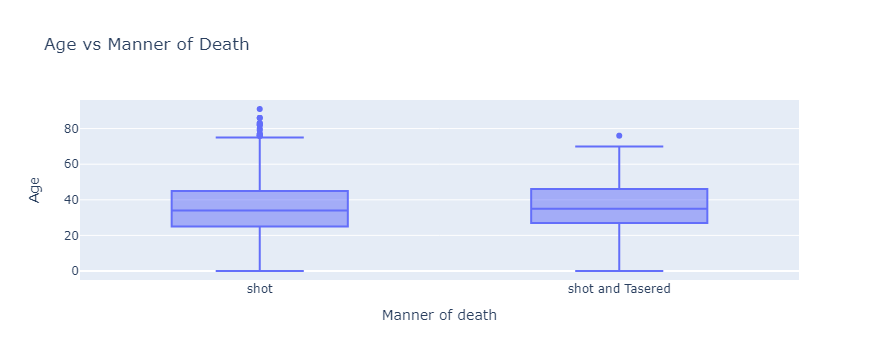

In [163]:
px.box(df_fatalities,
       x='manner_of_death',
       y='age',
       title='Age vs Manner of Death',
       labels={'age':'Age','manner_of_death':'Manner of death'})

In [33]:
gender_death = df_fatalities.groupby('manner_of_death',as_index=False)['gender'].value_counts()
gender_death

manner_of_death gender  count
0              shot      M   2261
1              shot      F    102
2  shot and Tasered      M    167
3  shot and Tasered      F      5

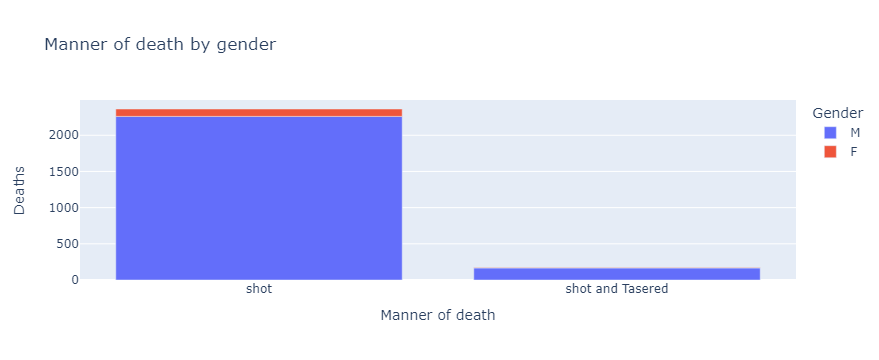

In [167]:
px.bar(gender_death,
       x='manner_of_death',
       y='count',
       color='gender',
       title='Manner of death by gender',
       labels={'count':'Deaths','manner_of_death':'Manner of death','gender':'Gender'})

The vast majority of victims where just shot, but a small percent of males, at the mean age of 35 were also tasered during the police encounters.

## Weapons and Mental-Illness

In what percentage of police killings were people armed? Let's check what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? How many of them were diagnosed with any mental-illness disease?

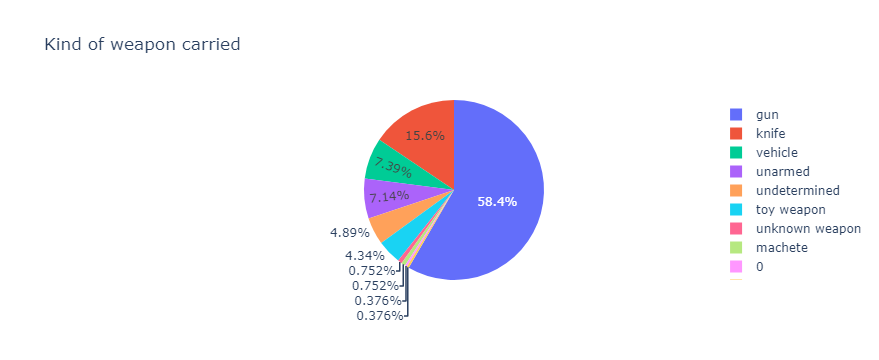

In [36]:
armed_counts = df_fatalities.armed.value_counts()
armed_counts.nlargest(10)
px.pie(labels=armed_counts.nlargest(10).index,values=armed_counts.nlargest(10).values,names=armed_counts.nlargest(10).index,title='Kind of weapon carried')

No surprise, that way over half of the victims were armed with guns, but what is more important and also shocking is that over 7% of people did not have any weapon at all! That means, at least theoretically, that these deaths could have been avoided, but, once again, theoretically is the key word.

In [47]:
mental_illness_pct = df_fatalities['signs_of_mental_illness'].where(df_fatalities['signs_of_mental_illness'] == True).count()/df_fatalities['signs_of_mental_illness'].count() *100
mental_illness_pct

24.970414201183434

A quarter of shot people were diagnosed with a mental-illness, which is a relatively high value.

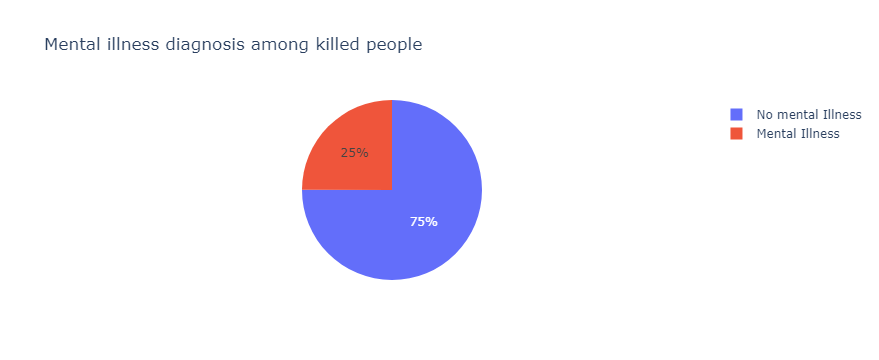

In [178]:
mental_illness = df_fatalities['signs_of_mental_illness'].value_counts()
px.pie(labels=mental_illness.index,
       values=mental_illness.values,
       names=['No mental Illness','Mental Illness'],
       title='Mental illness diagnosis among killed people')

## Cities

Below chart is the ranking of the top 10 cities with the most police killings. 

In [203]:
top10_death_cities = df_fatalities.groupby('city',as_index=False).agg({'name':'count'}).sort_values(by='name',ascending=False).nlargest(10,'name')
top10_death_cities

city  name
732   Los Angeles    39
995       Phoenix    31
578       Houston    27
241       Chicago    25
687     Las Vegas    21
1118  San Antonio    20
284      Columbus    19
808         Miami    18
60         Austin    18
1217    St. Louis    15

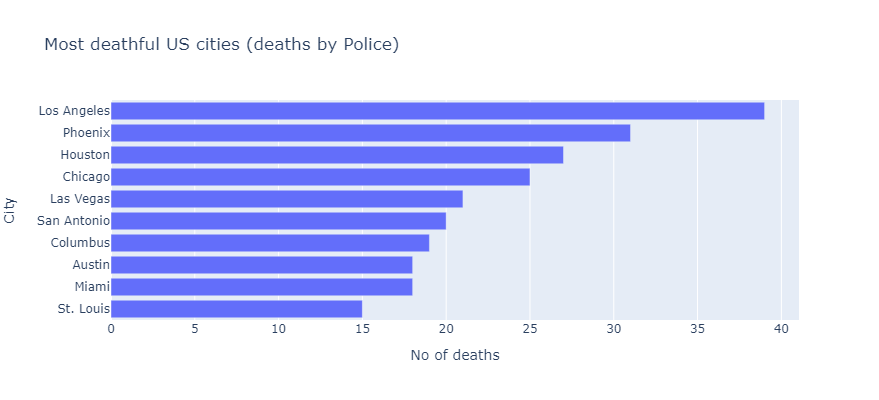

In [207]:
top10_death_cities.sort_values(by='name',ascending=True, inplace=True)
px.bar(top10_death_cities,
       x='name',
       y='city',
       orientation='h',
       title='Most deathful US cities (deaths by Police)',
       labels={'name':'No of deaths','city':'City'},
       height=400,
       width=600)

### Rate of Death by Race

Let's check the share of each race in the top 10 cities. The following plot works out the rate at which people are killed by race for each city.

In [210]:
top10_cities_race = df_fatalities[df_fatalities.city.isin(top10_death_cities.city)].groupby(['city','race'],as_index=False).agg({'name':'count'}).sort_values(by='name',ascending=False)
top10_cities_race.head()


city      race  name
3       Chicago     Black    21
23  Los Angeles  Hispanic    19
12      Houston     Black    15
2        Austin     White    13
36  San Antonio  Hispanic    12

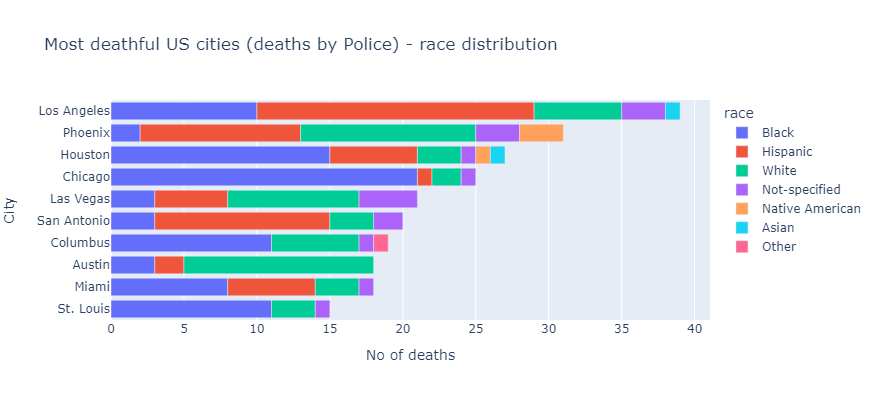

In [212]:
fig = px.bar(top10_cities_race,
             x='name',
             y='city',
             orientation='h',
             title='Most deathful US cities (deaths by Police) - race distribution',
             labels={'name':'No of deaths','city':'City'},
             height=400,
             width=600,
             color='race')
fig.update_layout(yaxis=dict(categoryorder='total ascending'))

Remembering how it was the white race leading in previous chapters' deaths analysis, it can be curious now to look how other races take bigger roles in the distributions. Its best visible in the leading city, Los Angeles, with almost 40 deaths, which of almost half are hispanic, quarter are black and just a few deaths of white people.
It's not solely for the leader though. For example Las Vegas or Phoenix or Houston also show wide distribution of few races.

## States

Which states are the most dangerous? Are these the same states with high degrees of poverty?

In [56]:
state_deaths = df_fatalities.groupby('state',as_index=False).agg({'name':'count'}).sort_values('name')

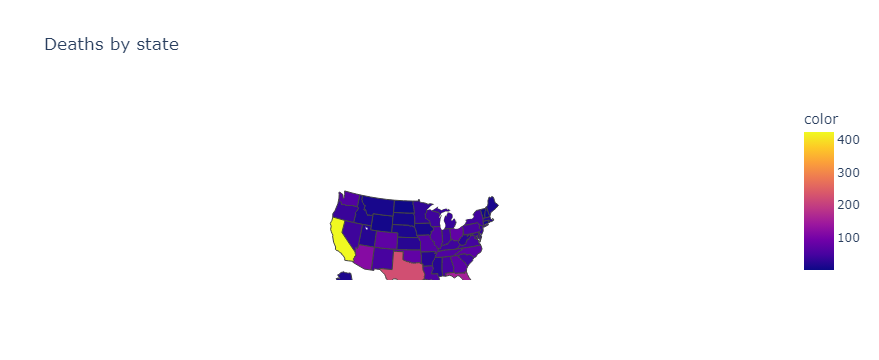

In [217]:
fig = px.choropleth(locations=state_deaths.state,
                    locationmode="USA-states",
                    color=state_deaths.name,
                    scope="usa",
                    title='Deaths by state')
fig.show()

The most dangerous state by police fatal shootings is inarguably the California - 424 deaths! And that is not a result of a high poverty because it was not in the top of that data. It may be caused by various state policies, weapon privileges and other aspects that need deeper analysis.
However, some of the states with high poverty rates are also high in death counts - that would be Arizona for example with 188 deaths.

## Number of Police Killings Over Time

Lastly let's check how the police killings look by the time perspective

In [309]:
df_fatalities['month_year'] = df_fatalities['date'].dt.to_period('M')

In [311]:
df_fatalities['month_year_str'] = df_fatalities['month_year'].astype(str)

deaths_by_time = df_fatalities.groupby('month_year_str', as_index=False).agg({'name': 'count'}).sort_values('month_year_str')
roll_deaths = deaths_by_time.rolling(window=3, on='month_year_str').mean()

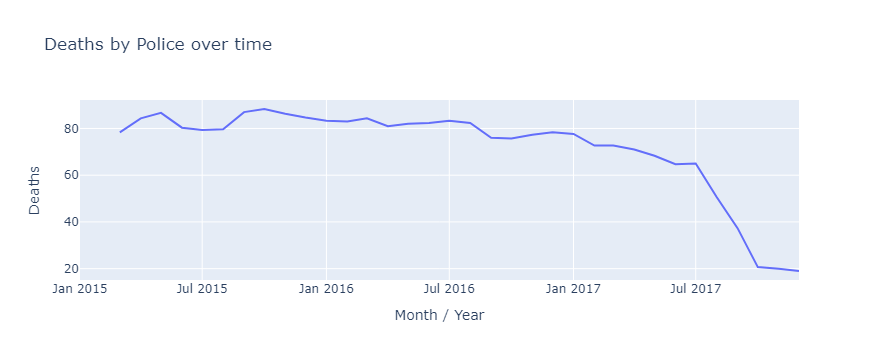

In [315]:
px.line(deaths_by_time,
        x='month_year_str',
        y=roll_deaths.name,
        title='Deaths by Police over time',
        labels={'y':'Deaths','month_year_str':'Month / Year'})

The number of deaths stayed pretty much consistent through 2015 and 2016 at over 80 deaths per month. Since the beginning of 2017 to the end of data set we observe lowering in death rate, but last months of this graph may not be reliable as this data may not be fully completed for October-December.

# Conclusion

  Having explored all the data sets, it must be right to say that many aspects impact the death rate in case of police shootings. It is not unusual, that in areas of higher poverty, the rate of vandalism, thefts and other misdemeanors are also higher. On the other hand, as it has been shown on plots, poverty is also correlated to schooling.
    
If we were obliged to say which race in the US is the most involved in deathful police shootings, many people would answer its the Black. But surprisingly, the analysis has shown that in most cases it is not really accurate. Best example would be states like DC or MS, where black's population is over 40% - the death count for these states is accordingly 11 and 23. Compared to California with 424 and Los Angeles as a top city in this data set it is a huge gap.

A really sad observation about this project is the number of young people being killed. Although the mean age of victims is ca. 37 years old, about a quarter of them is under 25 years old, which shows how easily and frequently young people, particularly men - because only 4% of killed were female - get into trouble at such a young age.
Last, but not least, it is also worth to mention the amount of unarmed people being shot - over 170. It is really terrifying that these people had to lose life while having no weapon with themselves, thus, the key-word theoretically, they were not dangerous against the police.